In [66]:
from random import gauss, randrange, choice, random
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def create_rewards(k=10):
    rewards = {}
    for i in range(k):
        q = gauss(0, 1)
        rewards[i] = q
        
    return rewards

rewards = create_rewards(20)
print(rewards[12])

-0.19175443473153042


In [68]:
def choose_action(A, eps=0):
    greedy = max(A, key=A.get)
    action = greedy
    if random() < eps:
        while action == greedy:
            action = choice(list(A.keys()))
    return action

A = {
    0: 1,
    1: 2,
    2: 6,
    3: 2,
    4: 1
}

choices = []
for i in range(1000):
    choices.append(choose_action(A, 0.1))
    
chosen = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0
}

for choice_ in choices:
    chosen[choice_] += 1
    
print(chosen)

{0: 29, 1: 23, 2: 901, 3: 19, 4: 28}


In [69]:
def collect_reward(a, rewards, sig=1):
    q = rewards[a]
    reward = gauss(0, sig) + q
    
    return reward

total = 0
rewards = create_rewards(20)
for i in range(100000):
    total += collect_reward(12, rewards)

print(total / 100000)

-1.0487633242073024


In [70]:
def evaluate_action_value(Q, na, r):
    if na == 0:
        return 0
    Q = Q + (1 / na) * (r - Q)
    return Q

In [71]:
def learn(k=10, eps=0, steps=1, sig=1):
    rewards = create_rewards(k)
    A = {a: 0 for a in range(k)}
    NA = {a: 0 for a in range(k)}
    history = []
    for step in range(steps):
        a = choose_action(A, eps)
        NA[a] += 1
        reward = collect_reward(a, rewards, sig)
        history.append({
            'a': a,
            'r': reward
        })
        A[a] = evaluate_action_value(A[a], NA[a], reward)
        
    rewards = [step['r'] for step in history]
    return rewards

rewards = learn(10, eps=0.1, steps=100)
for reward in rewards[:10]:
    print(reward)

-2.102600213743009
1.2795558666258353
-0.5306577478628598
-0.19464046622102238
2.1487521156387817
0.34252427529814333
0.13258284658599861
1.58307755326632
1.8788131568872994
0.8215228493337738


In [72]:
def create_histories(k=10, epss=[0, 0.01, 0.1], steps=1000, runs=2000, sig=1):
    histories = {}
    for eps in epss:
        histories[eps] = np.zeros((runs, steps))
        for run in range(runs):
            
            history = learn(k, eps, steps, sig)
            histories[eps][run] = history
        
        histories[eps] = np.average(histories[eps], axis=0)
    
    return histories

In [73]:
k = 10
epss = [0, 0.01, 0.05]
eps = 1 
rates = [100, 5000]
steps = 5000
runs = 5000
sig = 1

In [74]:
histories = create_histories(k, epss, steps, runs, sig)

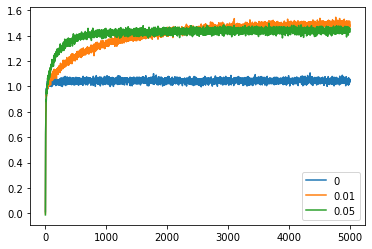

In [75]:
for eps, rewards in histories.items():
    plt.plot(rewards, label=eps)
plt.legend()
plt.show()

In [76]:
def adjust_epsilon(eps, run, rates):
    exponent = (-1 / rates[1]) * run
    adjustment = rates[0] ** exponent
    eps_adjusted = eps * adjustment
    
    return eps_adjusted

print(adjust_epsilon(0.1, 1000, [10, 2000]))

0.0316227766016838


In [77]:
def create_histories_single(k=10, eps=0.1, rates=[10, 2000], steps=1000, runs=2000, sig=1):
    history = np.zeros((runs, steps))
    for run in range(runs):
        eps_adjusted = adjust_epsilon(eps, run, rates)
        rewards = learn(k, eps_adjusted, steps, sig)
        history[run,:] = rewards
        
    history = np.average(history, axis=0)
    
    return history

In [78]:
history = create_histories_single(k=k, eps=eps, rates=rates, steps=steps, runs=runs, sig=sig)

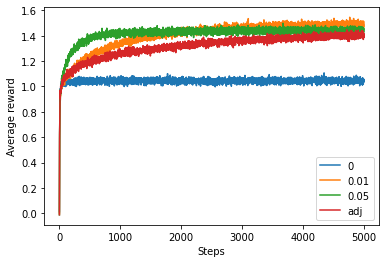

In [79]:
for eps, rewards in histories.items():
    plt.plot(rewards, label=eps)
plt.plot(history, label="adj")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()
plt.show()